In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("traffic_accidents.csv")
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [3]:
num_features = ["crash_hour", "crash_day_of_week", "crash_month", "injuries_fatal", "injuries_incapacitating"]
cat_features = ["weather_condition", "lighting_condition", "roadway_surface_cond", "traffic_control_device"]

In [4]:
y = df["injuries_total"]

In [5]:
df = df.dropna(subset=["injuries_total"]) #droping rows with missing values in injuries_total column

In [6]:
df_encoded = pd.get_dummies(df[cat_features],drop_first= True)
X= pd.concat([df[num_features],df_encoded], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [8]:
model = DecisionTreeRegressor(max_depth=5,random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

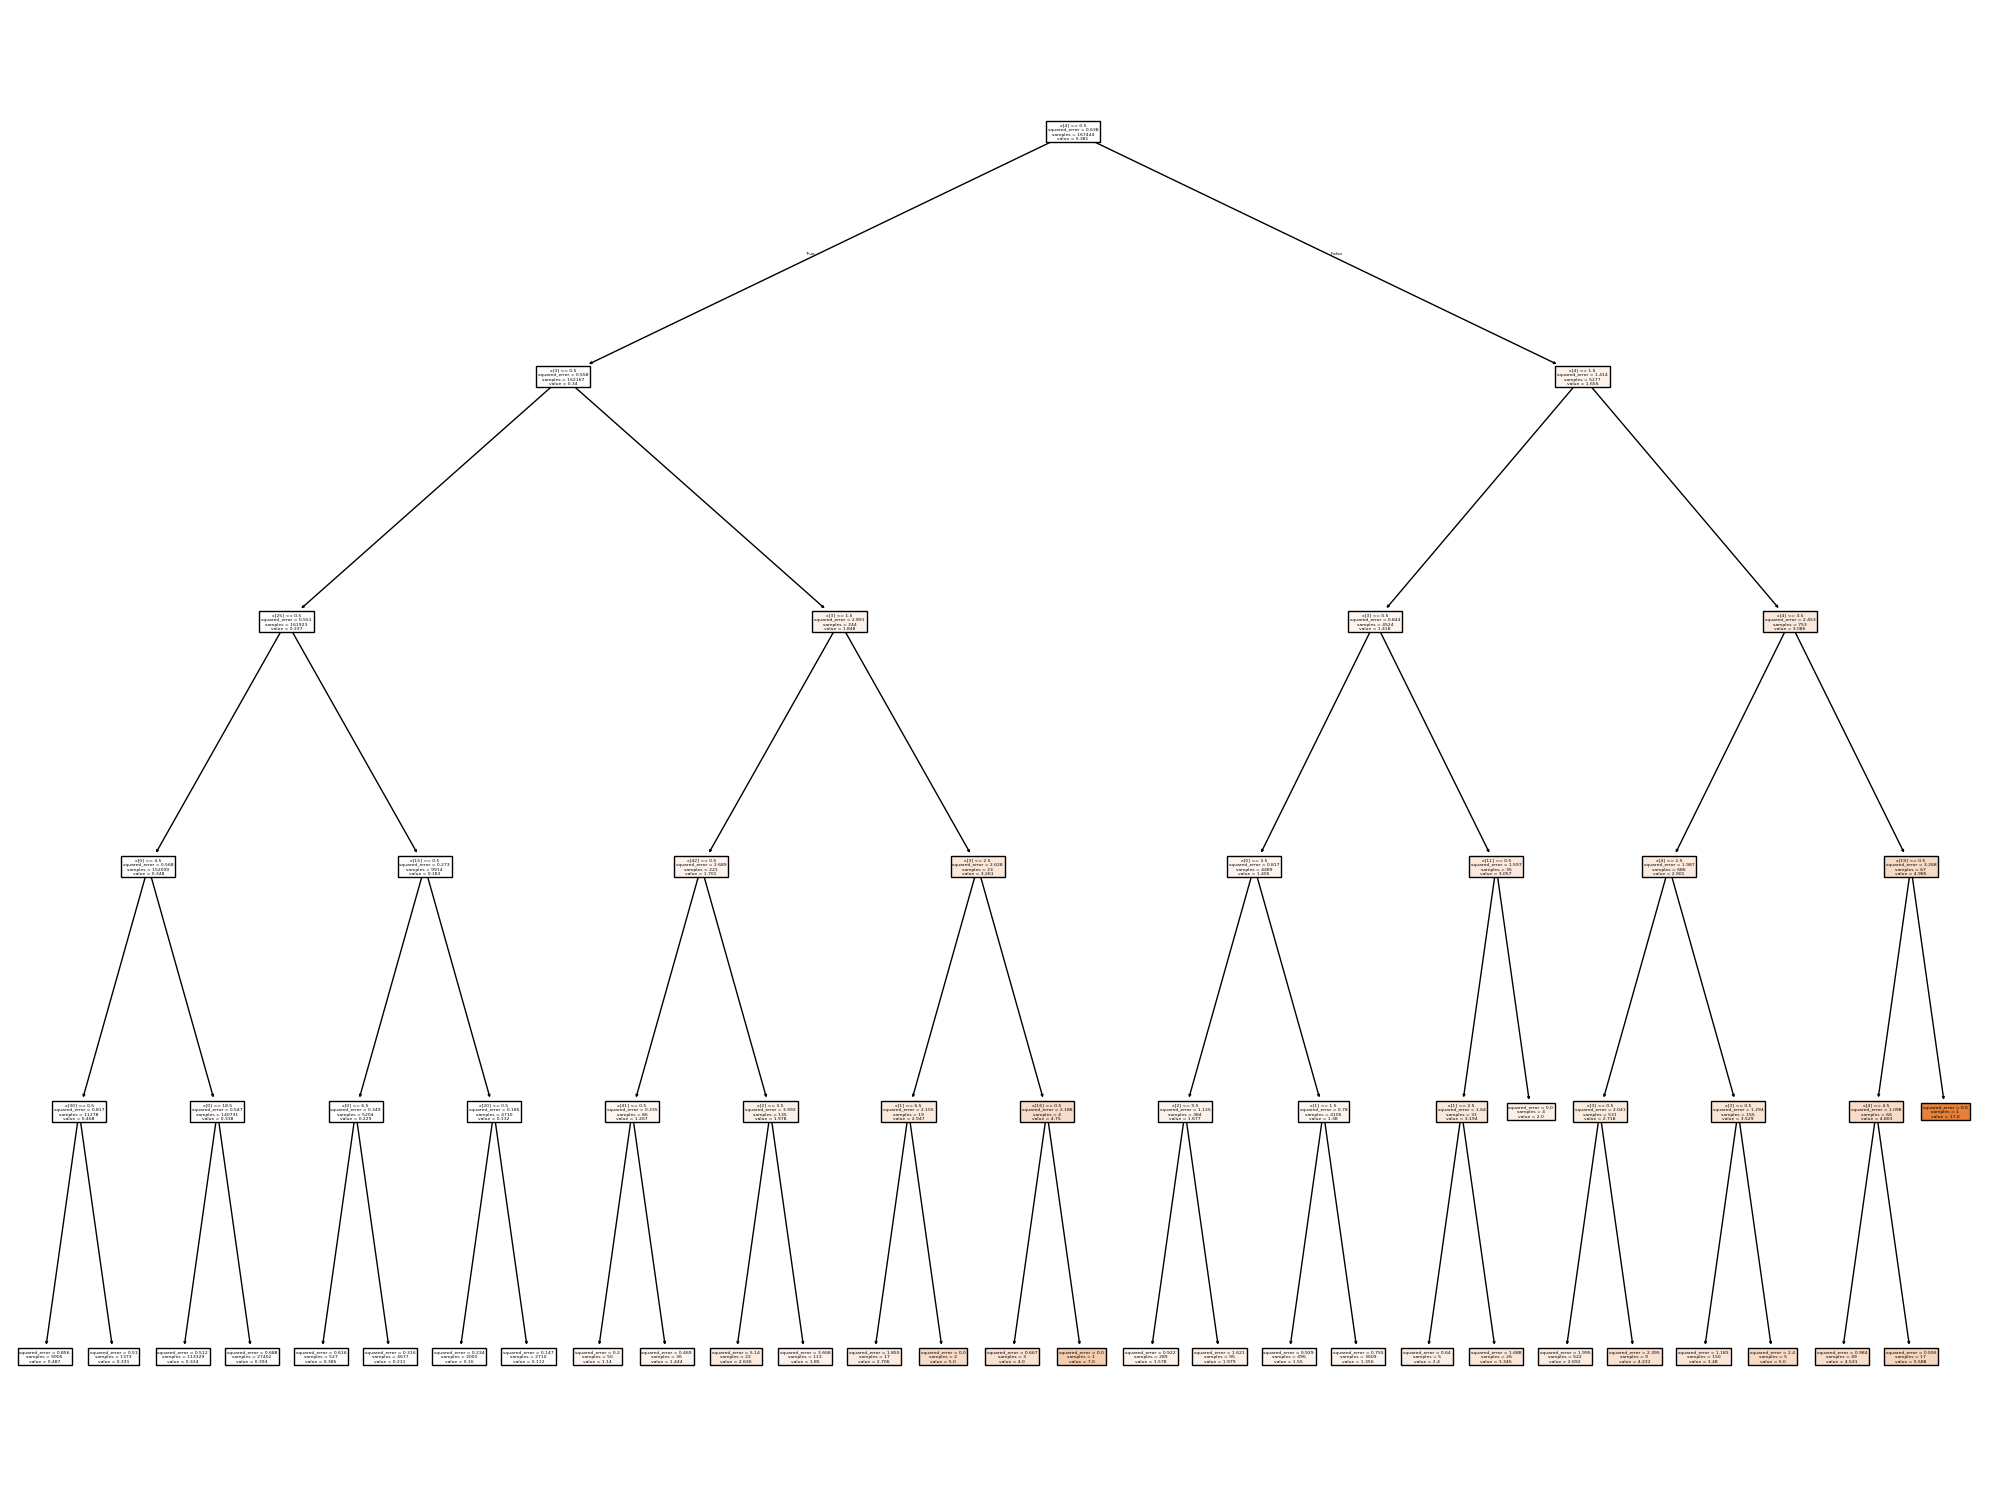

In [9]:
from sklearn import tree
plt.figure(figsize = (20,15))
tree.plot_tree(model, filled = True)
plt.tight_layout()

In [10]:
model_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

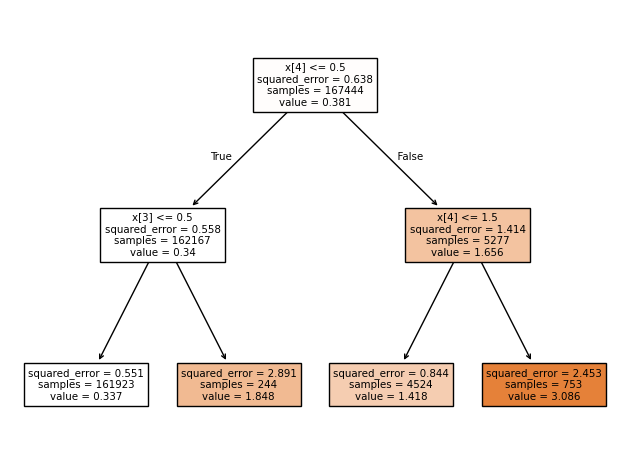

In [11]:
tree.plot_tree(model_tree , filled = True)
plt.tight_layout()

In [12]:
y1 = model.predict(X_test)
y2 = model_tree.predict(X_test)

In [13]:
 mse = mean_squared_error(y_test, y1)
r2 = r2_score(y_test, y1)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.5687934627226516
R² Score: 0.11782989990109105


In [14]:
mse = mean_squared_error(y_test, y2)
r2 = r2_score(y_test, y2)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.575441967956487
R² Score: 0.10751840212197428
